<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 5</span>
# <span style="color:green">Network Centralities

#### Computing and evaluating network centralities with Python’s NetworkX through the following template.

In [1]:
import networkx as nx
import pandas as pd 
import numpy as np
# import seaborn as sns
# sns.set(context="paper", font="monospace")
import random
import matplotlib.pyplot as plt
import math
import operator
from collections import Counter
from itertools import combinations, permutations
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
def create_centralities_list(G,maxiter=2000,pphi=5,centList=[]):
    if len(centList)==0:
        centList=['degree','closeness','betweenness','eigenvector','Katz','PageRank','HITS','load','communicability','current flow']
    cenLen=len(centList)
    valus={}
    for uu,centr in enumerate(centList):
        if centr=='degree':
            if isinstance(G,nx.DiGraph):
                cent=nx.in_degree_centrality(G)
                sstt='In Degree Centralities '
                valus['in_degree']=cent
                cent=nx.out_degree_centrality(G)
                sstt+= 'and Out Degree Centralities'
                valus['out_degree']=cent
            else:
                cent=nx.degree_centrality(G)
                sstt='Degree Centralities'
                ssttt='degree centrality'
                valus[centr]=cent
        elif centr=='closeness':
            cent=nx.closeness_centrality(G)
            sstt='Closeness Centralities'
            ssttt='closeness centrality'
            valus[centr]=cent
        elif centr =='load':
            cent=nx.load_centrality(G)
            sstt='Load Centraities'
            valus[centr]=cent
        elif centr == 'communicability':
            if not isinstance(G, nx.DiGraph):
                cent=nx.communicability_betweenness_centrality(G)
                sstt='Communicability Centralities'
                valus[centr]=cent
        elif centr=='betweenness':
            cent=nx.betweenness_centrality(G)
            sstt='Betweenness Centralities'
            ssttt='betweenness centrality'
            valus[centr]=cent
        elif centr=='current flow':
            if not isinstance(G, nx.DiGraph):
            
                cent=nx.current_flow_closeness_centrality(G)
                sstt='Current Flow Closeness Centrality'
                valus[centr]=cent
        elif centr=='eigenvector':
            try:
                cent=nx.eigenvector_centrality(G,max_iter=maxiter)
                sstt='Eigenvector Centralities'
                ssttt='eigenvector centrality'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='Katz':
            phi = (1+math.sqrt(pphi))/2.0 # largest eigenvalue of adj matrix
            cent=nx.katz_centrality_numpy(G,1/phi-0.01)
            cent=nx.katz_centrality_numpy(G,.05)#,1/phi-0.01)
            
            sstt='Katz Centralities'
            ssttt='Katz centrality'
            valus[centr]=cent
#             valus[centr+'_%i' %pphi]=cent

        elif centr=='PageRank':
            try:
                cent=nx.pagerank(G)
                sstt='PageRank'
                ssttt='pagerank'
                valus[centr]=cent

            except:
                valus[centr]=None

                continue
        elif centr=='HITS':
            if isinstance(G,nx.DiGraph):
                dd=nx.hits(G,max_iter=maxiter)
                sstt='HITS hubs '
                valus['HITS_hubs']=dd[0]
                sstt+= 'and HITS authorities'
                valus['HITS_auths']=dd[1]
            else:
                dd=nx.hits(G,max_iter=maxiter)
                cent=nx.degree_centrality(G)
                sstt='HITS'
                ssttt='HITS Centralities'
                valus[centr]=dd[0]
        else:
            continue
#         print '%s done!!!' %sstt
    return valus

dindices=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indices=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
# indices=['degree','closeness','betweenness','eigenvector']

# Without 'communicability' and 'current flow' (undirected case)
dindicesd=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
indicesd=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load']
# indicesd=['degree','closeness','betweenness','eigenvector']

dindicesdr=dindices
indicesdr=indices

# Plus 'node'
dindicesdrn=["node"]+dindices
indicesdrn=['node']+indices

def central_df(G,node,central_pd):
    central_pd[node]=central_pd.index.values
    if isinstance(G,nx.DiGraph):
        central_pd=central_pd[[node]+dindices]
    else:
        central_pd=central_pd[[node]+indices]
    central_pd[node]=central_pd.index.values
    central_pd.reset_index(drop = True, inplace = True)
    # central_pd=central_pd[['node']]
    central_pd.sort_values(node) #.head()
    # central_pd['node']=G.nodes()
    return central_pd

### 1. Florentine Families Graph

In [3]:
G=nx.florentine_families_graph()
name="Florentine Families Graph"

In [4]:
central_pd=pd.DataFrame(create_centralities_list(G))
node="node"
central_df(G,node,central_pd)

,node,degree,closeness,betweenness,eigenvector,HITS,Katz,PageRank,load,communicability,current flow
0,Acciaiuoli,0.071429,0.368421,0.000000,0.132157,0.037730,0.237040,0.030657,0.000000,0.027055,0.036909
1,Albizzi,0.214286,0.482759,0.212454,0.243961,0.069650,0.262470,0.079122,0.210623,0.261155,0.055316
2,Barbadori,0.142857,0.437500,0.093407,0.211706,0.060442,0.250113,0.050301,0.093407,0.124094,0.050897
3,Bischeri,0.214286,0.400000,0.104396,0.282794,0.080740,0.262620,0.068862,0.104396,0.162607,0.055459
4,Castellani,0.214286,0.388889,0.054945,0.259020,0.073952,0.261458,0.069330,0.054945,0.114575,0.052962
5,Ginori,0.071429,0.333333,0.000000,0.074925,0.021390,0.235242,0.032418,0.000000,0.011310,0.032177
6,Guadagni,0.285714,0.466667,0.254579,0.289117,0.082543,0.273357,0.098399,0.250916,0.305821,0.061155
7,Lamberteschi,0.071429,0.325581,0.000000,0.088793,0.025350,0.235786,0.030909,0.000000,0.013586,0.034069
8,Medici,0.428571,0.560000,0.521978,0.430315,0.122853,0.298431,0.145818,0.521978,0.591358,0.070954
9,Pazzi,0.071429,0.285714,0.000000,0.044815,0.012794,0.234557,0.036054,0.000000,0.007073,0.026251


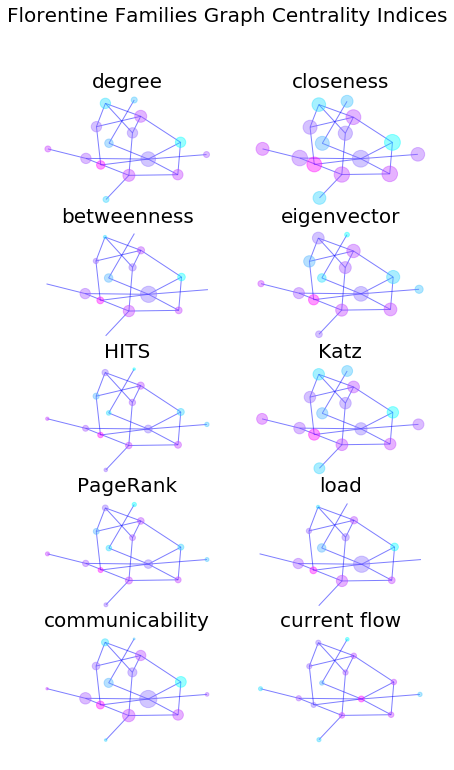

In [5]:
pos=nx.spring_layout(G,1.)
valus=create_centralities_list(G,maxiter=2000,pphi=5,centList=[])
if isinstance(G,nx.DiGraph):
    cts=['out_degree','in_degree','closeness','betweenness','eigenvector','HITS_hubs','HITS_auths','Katz','PageRank','load']
else:
    cts=['degree','closeness','betweenness','eigenvector','HITS','Katz','PageRank','load','communicability','current flow']
for cent in valus.values():
    cs={}
    for k,v in cent.items():
        if v not in cs:
            cs[v]=[k]
        else:
            cs[v].append(k)
    nodrank=[]
    uui=0
    for k in sorted(cs,reverse=True):
        for v in cs[k]:
            if uui<len(G): #5:
                nodrank.append(v)
                uui+=1
    nodeclo=[]
    for k,v in cent.items():
        if k in  nodrank :
            nodeclo.append(v)
        else:
            nodeclo.append(0.)
plt.figure(figsize=(7,12))
for i,j in enumerate(cts): 
    plt.subplot(len(cts)/2,2,i+1).set_title(j)
    nx.draw_networkx_nodes(G,pos=pos,nodelist=valus[j].keys(),
                               node_size=[500*x for x in valus[j].values()],
                               node_color=nodeclo,
                               cmap=plt.cm.cool,alpha=0.4) #Reds
    nx.draw_networkx_edges(G,pos=pos,edge_color='b', alpha=0.5)
    plt.title(j,fontsize=20)
    kk=plt.axis('off')
sst="%s Centrality Indices" %name
plt.suptitle(sst,fontsize=20);

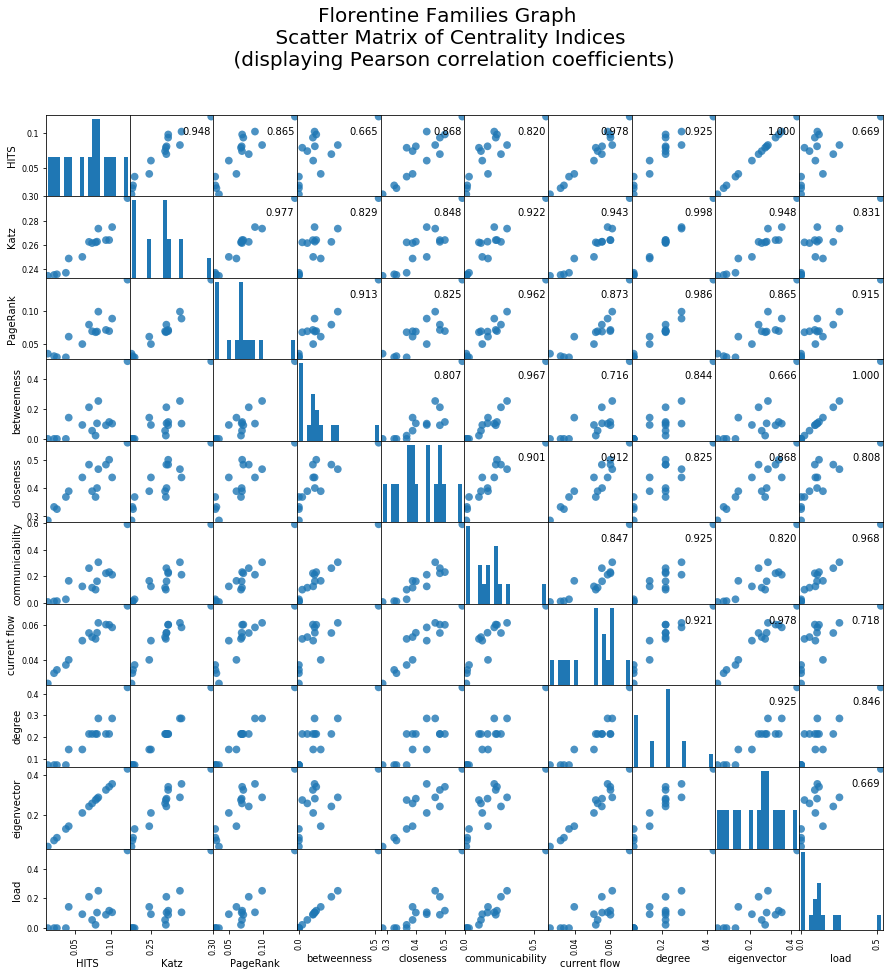

In [6]:
axes = pd.plotting.scatter_matrix(central_pd, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
corr = central_pd.corr().values 
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
sst="%s \n Scatter Matrix of Centrality Indices \n (displaying Pearson correlation coefficients)" %name
plt.suptitle(sst,fontsize=20);

**When running the cells below, in some case, you may need to change the parameter k in pos (here it is 1.) or the zooming parameter in the list of node_size (here it is 500).**  

### 2. Karate Club Graph

In [7]:
G=nx.karate_club_graph()
name="Karate Club Graph"

In [8]:
# Copy, paste and run cell 4 here:


In [9]:
# Copy, paste and run cell 5 here:


In [10]:
# Copy, paste and run cell 6 here:


### 3. Erdos-Renyi Random Undirected Graph

In [11]:
while True:
    nodes=random.randint(30,40)
    p=random.uniform(0.05,0.08)
    G=nx.erdos_renyi_graph(nodes,p)
    if nx.is_connected(G)==True:
        break
name="Erdos-Renyi Random Undirected Graph\n"

In [12]:
# Copy, paste and run cell 4 here:


In [13]:
# Copy, paste and run cell 5 here:


In [14]:
# Copy, paste and run cell 6 here:


### 4. Gnm Random Undirected Graph

In [15]:
while True:
    nodes=random.randint(30,40)
    edges=random.randint(50,70)
    G=nx.gnm_random_graph(nodes,edges)
    if nx.is_connected(G)==True:
        break
name="Gnm Random Undirected Graph/n"

In [16]:
# Copy, paste and run cell 4 here:


In [17]:
# Copy, paste and run cell 5 here:


In [18]:
# Copy, paste and run cell 6 here:


### 5. Strogatz-Watts Small-World Graph

In [19]:
nodes=random.randint(30,40)
k=random.randint(4,7) #Each node is joined with its k nearest neighbors in a ring topology
p=random.uniform(0.7,0.8) #rewiring probability
G=nx.watts_strogatz_graph(nodes, k, p)
name="Strogatz-Watts Small-World Graph\n"

In [20]:
# Copy, paste and run cell 4 here:


In [21]:
# Copy, paste and run cell 5 here:


In [22]:
# Copy, paste and run cell 6 here:


### 6. Barabasi-Albert Preferential Attachment Graph

In [23]:
n=random.randint(30,40) #no of nodes
m=random.randint(3,6)   #Number of edges to attach from a new node to existing nodes
G=nx.barabasi_albert_graph(n, m)
name="Barabasi-Albert Preferential Attachment Graph\n"

In [24]:
# Copy, paste and run cell 4 here:


In [25]:
# Copy, paste and run cell 5 here:


In [26]:
# Copy, paste and run cell 6 here:


### 7. Random Regular Graph

In [27]:
while True:
    n=random.randint(30,40) #no of nodes
    d=random.randint(4,7) #the common degree of nodes
    if n*d%2==0 and nx.is_connected(G)==True:
        break
G=nx.random_regular_graph(d, n)
name="Random Regular Graph"

In [28]:
# Copy, paste and run cell 4 here:


In [29]:
# Copy, paste and run cell 5 here:


In [30]:
# Copy, paste and run cell 6 here:


### 8. Random Bibartite Graph

In [31]:
while True:
    n = random.randint(10,15)   #nodes of the first partition
    m = random.randint(10,15)   #nodes of the second partition
    p=random.uniform(0.1,0.2)   #probability of edge existence
    alls=[]
    for y in range(n,n+m):
        for x in range(n):
            alls.append((x,y))
    eds=random.sample(alls,int(p*len(alls)))
    G=nx.Graph()
    G.add_edges_from(eds)
    if nx.is_connected(G)==True:
        break
name="Random Bibartite Graph"

In [32]:
# Copy, paste and run cell 4 here:


In [33]:
# Copy, paste and run cell 5 here:


In [34]:
# Copy, paste and run cell 6 here:


### 9. Random Power Law Tree

In [35]:
n=random.randint(25,35) #number of nodes
G=nx.random_powerlaw_tree(n,tries=1000)
name="Random Power Law Tree"

In [36]:
# Copy, paste and run cell 4 here:


In [37]:
# Copy, paste and run cell 5 here:


In [38]:
# Copy, paste and run cell 6 here:


### 10. Erdos-Renyi Random Directed Graph

In [39]:
while True:
    nodes=random.randint(37,42)
    p=random.uniform(0.05,0.08)
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    if nx.is_weakly_connected(G)==True:
        break
name="Erdos-Renyi Random Directed Graph\n"

In [40]:
# Copy, paste and run cell 4 here:


In [41]:
# Copy, paste and run cell 5 here:


In [42]:
# Copy, paste and run cell 6 here:


### 11. Gnm Random Weighted Graph

In [43]:
def weight_attr(G,maxw):
    # G is a graph
    # maxw is a positive integer (maximum weight value)
    weight={}
    for edge in G.edges():
        ed=edge[0]
        de=edge[1]
        G[ed][de]['weight']=random.randrange(1,maxw)
        weight[(ed,de)]=G[ed][de]['weight']
    return weight

In [44]:
while True:
    nodes=random.randint(47,52)
    edges=random.randint(70,80)
    G=nx.gnm_random_graph(nodes,edges)
    maxw=random.randint(7,12)
    weight=weight_attr(G,maxw)
    w_edges=[(x,y,z) for (x,y),z in weight.items()]
    G.add_weighted_edges_from(w_edges)
    if nx.is_connected(G)==True:
        break
name="Gnm Random Weighted Graph\n"

In [45]:
# Copy, paste and run cell 4 here:


In [46]:
# Copy, paste and run cell 5 here:


In [47]:
# Copy, paste and run cell 6 here:


### 12. Erdos-Renyi Random Weighted Directed Graph

In [48]:
while True:
    nodes=random.randint(47,52)
    p=random.uniform(0.05,0.08)
    G=nx.erdos_renyi_graph(nodes,p,directed=True)
    maxw=random.randint(7,12)
    weight=weight_attr(G,maxw)
    w_edges=[(x,y,z) for (x,y),z in weight.items()]
    G.add_weighted_edges_from(w_edges)
    if nx.is_weakly_connected(G)==True:
        break
name="Erdos-Renyi Random Weighted Directed Graph\n"

In [49]:
# Copy, paste and run cell 4 here:


In [50]:
# Copy, paste and run cell 5 here:


In [51]:
# Copy, paste and run cell 6 here:
